# 4.了解典型的CNN架构

https://github.com/WZMIAOMIAO/deep-learning-for-image-processing/tree/master

### 1.LeNet-5

参考文献：https://zhuanlan.zhihu.com/p/657602028

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Layer,Dense,Conv2D,AvgPool2D,Flatten,MaxPool2D,Dropout,concatenate,Input,Softmax,BatchNormalization,Activation,GlobalAveragePooling2D,ReLU
from tensorflow.keras import optimizers,losses,models,metrics

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

X_train4D=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_test4D = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

#归一化
X_train4D_Normalize = X_train4D / 255 # 归一化
X_test4D_Normalize = X_test4D / 255

#将类别向量映射为二值类别矩阵,将原有的类别向量转换为独热编码的形式
y_trainOnehot=to_categorical(y_train)
y_testOnehot = to_categorical(y_test)
y_testOnehot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [3]:
model = Sequential()
model.add(Conv2D(filters=6,kernel_size=(5,5),strides=1,input_shape=[28,28,1],activation='relu'))
model.add(AvgPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=16,kernel_size=(5,5),strides=1,activation='relu'))
model.add(AvgPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(120,activation='relu'))
model.add(Dense(84,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [4]:
'''编译'''
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

'''训练'''
epochs=10
history=model.fit(x=X_train4D_Normalize,y=y_trainOnehot,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2537 - accuracy: 0.9247 - val_loss: 0.0932 - val_accuracy: 0.9720
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0774 - accuracy: 0.9760 - val_loss: 0.0623 - val_accuracy: 0.9818
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0565 - accuracy: 0.9820 - val_loss: 0.0516 - val_accuracy: 0.9843
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0428 - accuracy: 0.9865 - val_loss: 0.0442 - val_accuracy: 0.9874
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0366 - accuracy: 0.9880 - val_loss: 0.0494 - val_accuracy: 0.9860
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0299 - accuracy: 0.9907 - val_loss: 0.0408 - val_accuracy: 0.9880
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0260 - accuracy: 0.9919 - val_loss: 0.0376 - val_accuracy:

In [5]:
'''评估'''
test_loss, test_acc = model.evaluate(X_test4D_Normalize,y_testOnehot,verbose=2) #损失值和准确率
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

313/313 - 1s - loss: 0.0408 - accuracy: 0.9888

Test accuracy: 0.9887999892234802

Test loss: 0.04078428074717522


### 2.AlexNet
* 数据增强
* dropout率为50%的Dropout技术
* 局部响应归一化（LRN）

https://zhuanlan.zhihu.com/p/670411264

In [6]:
def AlexNet(input_shape,num_classes):
    #建立模型
    model = Sequential()
    #一层卷积
    model.add(Conv2D(filters=96,kernel_size=(11,11),strides=4,input_shape=input_shape,padding='VALID',activation='relu'))
    model.add(MaxPool2D(pool_size=(3,3),strides=2))
    #二层卷积
    model.add(Conv2D(filters=256,kernel_size=(5,5),strides=1,padding='SAME',activation='relu'))
    model.add(MaxPool2D(pool_size=(3,3),strides=2))
    #三层卷积
    model.add(Conv2D(filters=384,kernel_size=(3,3),strides=1,padding='SAME',activation='relu' ))
    #四层卷积
    model.add(Conv2D(filters=384,kernel_size=(3,3),strides=1,padding='SAME',activation='relu' ))
    #五层卷积
    model.add(Conv2D(filters=256,kernel_size=(3,3),strides=1,adding='SAME',activation='relu'))
    model.add(MaxPool2D(pool_size=(3,3),strides=2))

    #全连接层
    #将多维输入一维化，即展平操作。这是从卷积层到全连接层的过渡
    model.add(Flatten())
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation='softmax'))

    return model

In [7]:
input_shape=[227,227,3]
num_classes=1000

model=AlexNet(input_shape,num_classes)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 256)      

### 3.GooLeNet

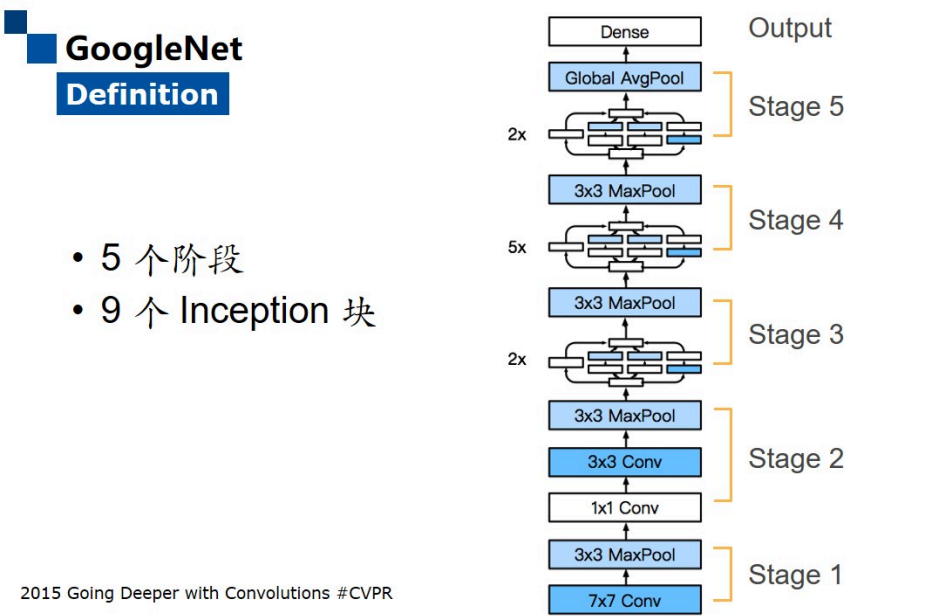
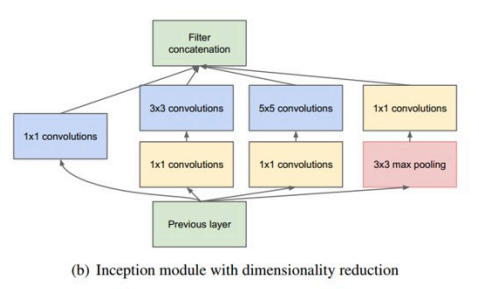

![alt text](<截屏2024-04-06 下午3.45.02.png>)

Inception模块能更有效地使用参数：
* GooLeNet具有AlexNet的1/10的参数
* Inception模块
* 全局平均池化

https://blog.csdn.net/SpiritedAway1106/article/details/115758271

* 使用平均池化代替最后的全连接层，结果发现替换全连接层之后，top1的分类精度提高了0.6 %
* 为了方便迁移学习，在平均池化之后加了一层具有1000个神经元的全连接层，使用softmax激活函数
* 在全局池化层和全连接层之间，使用了Dropout
* 网络太深可能导致梯度消失，且作者发现该网络结构的浅层也能有很好的判决能力，因此在网络中添加了两个辅助分类器，防止梯度消失并增加正则化。辅助分类器的损失以0.3的权重加入主分类器的损失中。 辅助分类器的配置如下：
在inception(4a)和inception(4d)的输出位置添加两个辅助分类器，首先是使用大小为5*5，步长为3的平均池化
使用128个1*1的卷积进行降维，使用relu激活函数
使用具有1024个神经元的全连接层，使用relu激活函数
使用Dropout，丢失率70%
使用具有1000个神经元的全连接层，使用softmax激活函数


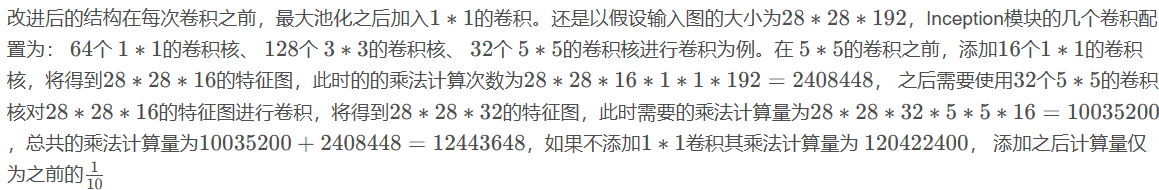

In [19]:
class Inception(Layer,):
    def __init__(self,conv1_1,conv_reduce3_3,conv3_3,conv_reduce5_5,conv5_5,pool_proj,**kwargs):
        super(Inception,self).__init__(**kwargs)
        '''1×1分枝'''
        self.branch1=Conv2D(filters=conv1_1,kernel_size=(1,1),activation='relu')

        '''
        3×3分枝
        1x1卷积核用于减少通道数，以降低计算量
        '''
        self.branch2=Sequential([
            Conv2D(filters=conv_reduce3_3,kernel_size=(1,1),activation='relu'),
            Conv2D(filters=conv3_3,kernel_size=(3,3),padding='SAME',activation='relu')
        ])

        '''5×5分枝'''
        self.branch3=Sequential([
            Conv2D(filters=conv_reduce5_5,kernel_size=(1,1),activation='relu'),
            Conv2D(filters=conv5_5,kernel_size=(5,5),padding='SAME',activation='relu')
        ])

        self.branch4=Sequential([
            MaxPool2D(pool_size=3,strides=1,padding='SAME'),
            Conv2D(filters=pool_proj,kernel_size=(1,1),activation='relu')
        ])

    def call(self,inputs):
        branch1=self.branch1(inputs)
        branch2=self.branch2(inputs)
        branch3=self.branch3(inputs)
        branch4=self.branch4(inputs)
        outputs=concatenate([branch1,branch2,branch3,branch4])
        return outputs

In [21]:
'''定义辅助分类器'''
class AuxiliaryClassifier(Layer,):
    def __init__(self, **kwargs):
        super(AuxiliaryClassifier,self).__init__(**kwargs)
        self.avgpool=AvgPool2D(pool_size=5,strides=3)
        self.conv=Conv2D(filters=128,kernel_size=1,activation='relu')
        self.flatten=Flatten()
        self.fc1=Dense(1024,activation='relu')
        self.dropout=Dropout(0.7)
        self.fc2=Dense(1000,activation='softmax')

    def call(self,inputs):
        x=self.avgpool(inputs)
        x=self.conv(x)
        x=self.flatten(x)
        x=self.fc1(x)
        x=self.dropout(x)
        outputs=self.fc2(x)
        return outputs

In [22]:
def GoogLeNet(model_name='GoogLeNet',im_height=224,im_width=224,class_num=1000):
    #[224,224,3]
    inputs=Input(shape=(im_height,im_width,3),name='Inputs')
    #[112,112,64]
    x=Conv2D(filters=64,kernel_size=7,strides=2,padding='same',activation='relu',name='convolution-1')(inputs)
    #[56,56,64]
    x=MaxPool2D(pool_size=3,strides=2,padding='same',name='max-pool-1')(x)
    #[56,56,192]
    x=Conv2D(filters=192,kernel_size=3,strides=1,padding='same',activation='relu',name='convolution-2')(inputs)
    #[28,28,192]
    x=MaxPool2D(pool_size=3,strides=2,padding='same',name='max-pool-2')(x)
    #[28,28,256]
    x=Inception(64,96,128,16,32,32,name='inception-3a')(x)
    #[28,28,480]
    x=Inception(128,128,192,32,96,64,name='inception-3b')(x)
    #[14,14,480]
    x=MaxPool2D(pool_size=3,strides=2,padding='same',name='max-pool-3')(x)
    #[14,14,512]
    x=Inception(192,96,208,16,48,64,name='inception-4a')(x)
    #[1000]
    outputs1=AuxiliaryClassifier(name='AuxiliaryClassifier-1')(x)
    #[14,14,512]
    x=Inception(160,112,224,24,64,64,name='inception-4b')(x)
    #[14,14,512]
    x=Inception(128,128,256,24,64,64,name='inception-4c')(x)
    #[14,14,528]
    x=Inception(112,144,288,32,64,64,name='inception-4d')(x)
    #[1000]
    outputs2=AuxiliaryClassifier(name='AuxiliaryClassifier-2')(x)
    #[14,14,832]
    x=Inception(256,160,320,32,128,128,name='inception-4e')(x)
    #[7,7,832]
    x=MaxPool2D(pool_size=3,strides=2,padding='same',name='max-pool-4')(x)
    #[7,7,832]
    x=Inception(256,160,320,32,128,128,name='inception-5a')(x)
    #[7,7,1024]
    x=Inception(384,192,384,48,128,128,name='inception-5b')(x)
    #[1,1,1024]
    x=AvgPool2D(pool_size=7,strides=1,name='avg-pool')(x)
    #[1024]
    x=Flatten(name='flatten')(x)
    x=Dropout(0.4,name='dropout')(x)
    x=Dense(1000,name='linear')(x)
    outputs=Softmax(name='softmax')(x)
    model=Model(inputs=inputs,outputs=[outputs1,outputs2,outputs],name='GoogLeNet')
    return model

model=GoogLeNet()
model.summary()

Model: "GoogLeNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Inputs (InputLayer)             [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
convolution-2 (Conv2D)          (None, 224, 224, 192 5376        Inputs[0][0]                     
__________________________________________________________________________________________________
max-pool-2 (MaxPooling2D)       (None, 112, 112, 192 0           convolution-2[0][0]              
__________________________________________________________________________________________________
inception-3a (Inception)        (None, 112, 112, 256 163696      max-pool-2[0][0]                 
__________________________________________________________________________________________

### 4.VGGNet (VGG-16)
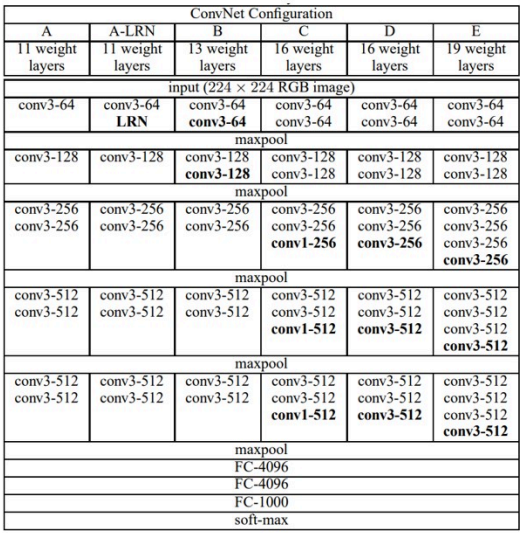

* 更大更深的AlexNet（重复的VGG块）
* 更多的稠密层
* 更多的卷积层
* 分组成块

https://zhuanlan.zhihu.com/p/370910026

In [8]:
#构建VGG块
def vgg_block(num_conv,num_filters):
    blk=Sequential()
    for _ in range(num_conv):
        blk.add(Conv2D(num_filters,kernel_size=3,padding='SAME',activation='relu'))

    blk.add(MaxPool2D(pool_size=(2,2),strides=2))
    return blk

In [16]:
#构建模型
def vgg(conv_arch):
    net=Sequential()
    for (num_convs,num_filters) in conv_arch:
        net.add(vgg_block(num_convs,num_filters))
    net.add(Sequential([
        Flatten(),
        Dense(4096,activation='relu'),
        Dropout(0.5),
        Dense(4096,activation='relu'),
        Dropout(0.5),
        Dense(1000,activation='relu')
    ]))
    return net

In [18]:
# 卷积块的参数
conv_arch = ((2, 64), (2, 128), (3, 256), (3, 512), (3, 512))
# 实例化
net = vgg(conv_arch)

# 查看模型结构
x = tf.random.uniform((1, 224, 224, 1))
y = net(x)
net.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_45 (Sequential)   (1, 112, 112, 64)         37568     
_________________________________________________________________
sequential_46 (Sequential)   (1, 56, 56, 128)          221440    
_________________________________________________________________
sequential_47 (Sequential)   (1, 28, 28, 256)          1475328   
_________________________________________________________________
sequential_48 (Sequential)   (1, 14, 14, 512)          5899776   
_________________________________________________________________
sequential_49 (Sequential)   (1, 7, 7, 512)            7079424   
_________________________________________________________________
sequential_50 (Sequential)   (1, 1000)                 123642856 
Total params: 138,356,392
Trainable params: 138,356,392
Non-trainable params: 0
_______________________________________

### 5.ResNet

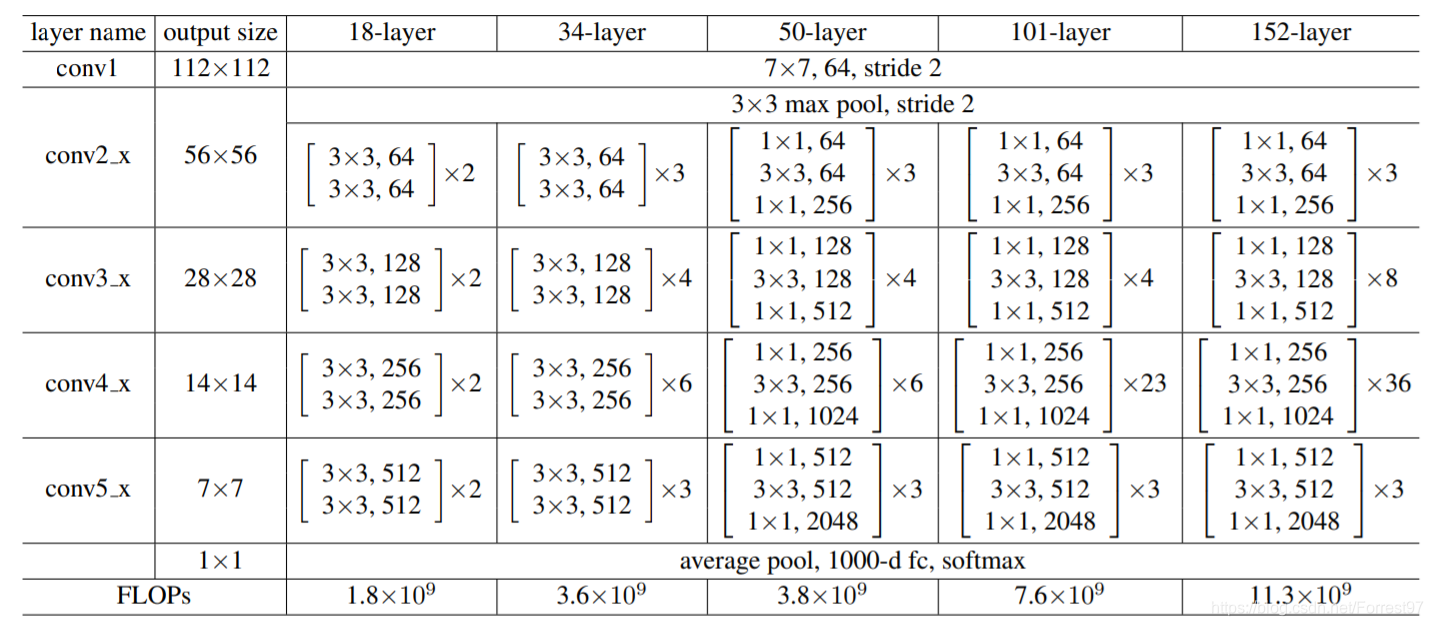

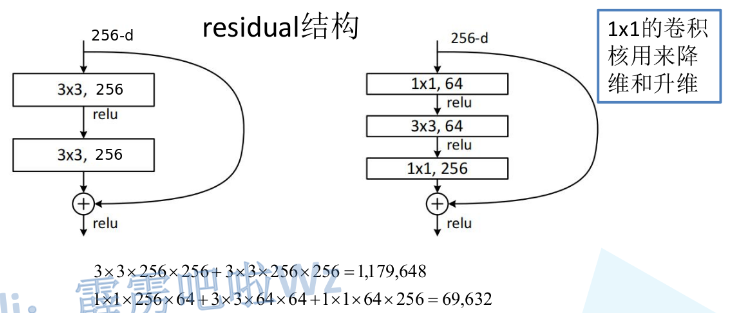

* 每个 Conv2D 层后面都跟着批量归一化

https://github.com/WZMIAOMIAO/deep-learning-for-image-processing/blob/master/tensorflow_classification/Test5_resnet/model.py

* 提出residual结构（残差结构），并搭建超深的网络结构(突破1000层)
* 使用Batch Normalization加速训练

当堆叠到一定网络深度时，就会出现两个问题。1）梯度消失或梯度爆炸。 2）退化问题

使用BN（Batch Normalization）层能够解决梯度消失或者梯度爆炸问题

In [12]:
from tensorflow.keras import layers, Model, Sequential

class BasicBlock(layers.Layer):
    expansion = 1
    def __init__(self, out_channel, strides=1, downsample=None, **kwargs):
        super(BasicBlock, self).__init__(**kwargs)
        self.conv1 = layers.Conv2D(out_channel, kernel_size=3, strides=strides,padding="SAME", use_bias=False)
        self.bn1 = layers.BatchNormalization(momentum=0.9, epsilon=1e-5)
        # -----------------------------------------
        self.conv2 = layers.Conv2D(out_channel, kernel_size=3, strides=1,padding="SAME", use_bias=False)
        self.bn2 = layers.BatchNormalization(momentum=0.9, epsilon=1e-5)
        # -----------------------------------------
        self.downsample = downsample
        self.relu = layers.ReLU()
        self.add = layers.Add()

    def call(self, inputs, training=False):
        identity = inputs
        if self.downsample is not None:
            identity = self.downsample(inputs)
        x = self.conv1(inputs)
        x = self.bn1(x, training=training)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x, training=training)
        x = self.add([identity, x])
        x = self.relu(x)
        return x

class Bottleneck(layers.Layer):
    """
    注意：原论文中，在虚线残差结构的主分支上，第一个1x1卷积层的步距是2，第二个3x3卷积层步距是1。
    但在pytorch官方实现过程中是第一个1x1卷积层的步距是1，第二个3x3卷积层步距是2，
    这么做的好处是能够在top1上提升大概0.5%的准确率。
    可参考Resnet v1.5 https://ngc.nvidia.com/catalog/model-scripts/nvidia:resnet_50_v1_5_for_pytorch
    """
    expansion = 4

    def __init__(self, out_channel, strides=1, downsample=None, **kwargs):
        super(Bottleneck, self).__init__(**kwargs)
        self.conv1 = layers.Conv2D(out_channel, kernel_size=1, use_bias=False, name="conv1")
        self.bn1 = layers.BatchNormalization(momentum=0.9, epsilon=1e-5, name="conv1/BatchNorm")
        # -----------------------------------------
        self.conv2 = layers.Conv2D(out_channel, kernel_size=3, use_bias=False,
                                   strides=strides, padding="SAME", name="conv2")
        self.bn2 = layers.BatchNormalization(momentum=0.9, epsilon=1e-5, name="conv2/BatchNorm")
        # -----------------------------------------
        self.conv3 = layers.Conv2D(out_channel * self.expansion, kernel_size=1, use_bias=False, name="conv3")
        self.bn3 = layers.BatchNormalization(momentum=0.9, epsilon=1e-5, name="conv3/BatchNorm")
        # -----------------------------------------
        self.relu = layers.ReLU()
        self.downsample = downsample
        self.add = layers.Add()

    def call(self, inputs, training=False):
        identity = inputs
        if self.downsample is not None:
            identity = self.downsample(inputs)

        x = self.conv1(inputs)
        x = self.bn1(x, training=training)
        x = self.relu(x)

        x = self.conv2(x)
        x = self.bn2(x, training=training)
        x = self.relu(x)

        x = self.conv3(x)
        x = self.bn3(x, training=training)

        x = self.add([x, identity])
        x = self.relu(x)

        return x


def _make_layer(block, in_channel, channel, block_num, name, strides=1):
    downsample = None
    if strides != 1 or in_channel != channel * block.expansion:
        downsample = Sequential([
            layers.Conv2D(channel * block.expansion, kernel_size=1, strides=strides,use_bias=False, name="conv1"),
            layers.BatchNormalization(momentum=0.9, epsilon=1.001e-5, name="BatchNorm")
        ], name="shortcut")

    layers_list = []
    layers_list.append(block(channel, downsample=downsample, strides=strides, name="unit_1"))

    for index in range(1, block_num):
        layers_list.append(block(channel, name="unit_" + str(index + 1)))

    return Sequential(layers_list, name=name)


def _resnet(block, blocks_num, im_width=224, im_height=224, num_classes=1000, include_top=True):
    # tensorflow中的tensor通道排序是NHWC
    # (None, 224, 224, 3)
    input_image = layers.Input(shape=(im_height, im_width, 3), dtype="float32")
    x = layers.Conv2D(filters=64, kernel_size=7, strides=2,
                      padding="SAME", use_bias=False, name="conv1")(input_image)
    x = layers.BatchNormalization(momentum=0.9, epsilon=1e-5, name="conv1/BatchNorm")(x)
    x = layers.ReLU()(x)
    x = layers.MaxPool2D(pool_size=3, strides=2, padding="SAME")(x)

    x = _make_layer(block, x.shape[-1], 64, blocks_num[0], name="block1")(x)
    x = _make_layer(block, x.shape[-1], 128, blocks_num[1], strides=2, name="block2")(x)
    x = _make_layer(block, x.shape[-1], 256, blocks_num[2], strides=2, name="block3")(x)
    x = _make_layer(block, x.shape[-1], 512, blocks_num[3], strides=2, name="block4")(x)

    if include_top:
        x = layers.GlobalAvgPool2D()(x)  # pool + flatten
        x = layers.Dense(num_classes, name="logits")(x)
        predict = layers.Softmax()(x)
    else:
        predict = x
    model = Model(inputs=input_image, outputs=predict)
    return model


def resnet34(im_width=224, im_height=224, num_classes=1000, include_top=True):
    return _resnet(BasicBlock, [3, 4, 6, 3], im_width, im_height, num_classes, include_top)

model = resnet34()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 64)      9408      
_________________________________________________________________
conv1/BatchNorm (BatchNormal (None, 112, 112, 64)      256       
_________________________________________________________________
re_lu_153 (ReLU)             (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
block1 (Sequential)          (None, 56, 56, 64)        222720    
_________________________________________________________________
block2 (Sequential)          (None, 28, 28, 128)       111872